In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist

%matplotlib inline

In [2]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
train_X.shape

11490434/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)

In [3]:
type(train_X[0])

numpy.ndarray

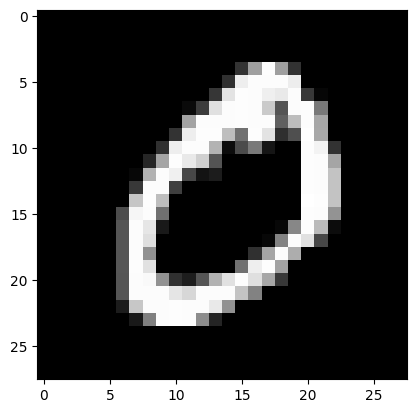

In [4]:
plt.imshow(train_X[1],cmap='gray')

In [5]:
type(train_x)

NameError: name 'train_x' is not defined

In [6]:
#normalize and reshaping our X data
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

train_X = train_X/255
test_X  = test_X/255

#one hot encode our y data
from keras.utils import np_utils 
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

In [7]:
type(train_X)

numpy.ndarray

In [8]:
#creating our model
input_shape=(28,28,1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape,padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.02),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
# training our data
batch_size=32
epochs=40

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Epoch 1/40
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4522 - accuracy: 0.8572 - val_loss: 0.0892 - val_accuracy: 0.9715
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1453 - accuracy: 0.9563 - val_loss: 0.0647 - val_accuracy: 0.9779
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1095 - accuracy: 0.9665 - val_loss: 0.0465 - val_accuracy: 0.9850
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0914 - accuracy: 0.9727 - val_loss: 0.0384 - val_accuracy: 0.9867
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0776 - accuracy: 0.9767 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.0338 - val_accuracy: 0.9874
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0297 - val_accuracy

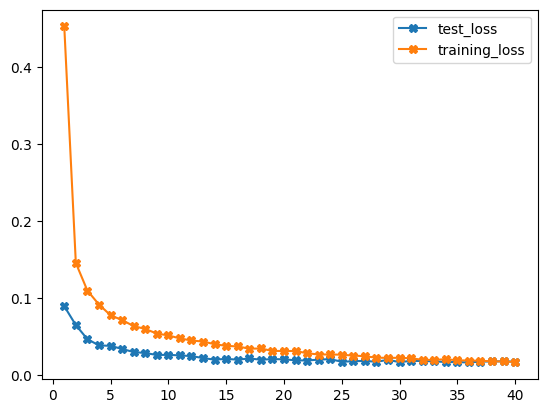

In [10]:
plotting_data_dict = plotting_data.history

test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

epochs = range(1,len(test_loss)+1)

plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()

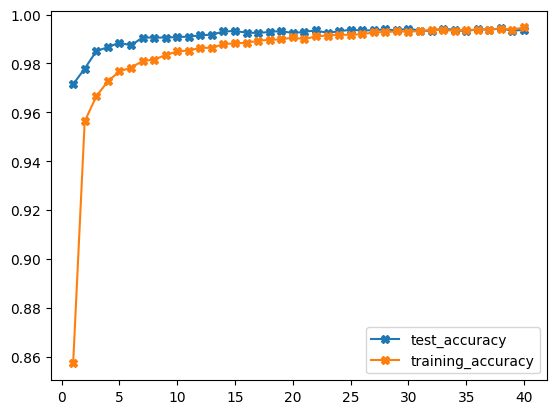

In [11]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

In [12]:
model.save('MNIST_40_epochs.h5')
print('Model Saved !!!')

Model Saved !!!


In [13]:
classifier = load_model('MNIST_40_epochs.h5')

# Live predictor


In [ ]:
drawing=False
cv2.namedWindow('win')
black_image = np.zeros((256,256,3),np.uint8)
ix,iy=-1,-1

def draw_circles(event,x,y,flags,param):
    global ix,iy,drawing
    if event== cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix,iy=x,y
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(black_image,(x,y),5,(255,255,255),-1)
            
    elif event==cv2.EVENT_LBUTTONUP:
        drawing = False
        
cv2.setMouseCallback('win',draw_circles)

while True:
    cv2.imshow('win',black_image)
    if cv2.waitKey(1)==27:
        break
    elif cv2.waitKey(1)==13:
        input_img = cv2.resize(black_image,(28,28))
        input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
        input_img = input_img.reshape(1,28,28,1)
        res = np.argmax(classifier.predict(input_img,1,verbose=0))
        cv2.putText(black_image,text=str(res),org=(205,30),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(255,255,255),thickness=2)
    elif cv2.waitKey(1)==ord('c'):
        black_image = np.zeros((256,256,3),np.uint8)
        ix,iy=-1,-1
cv2.destroyAllWindows()